<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

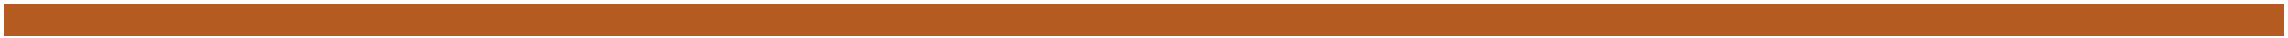

## <font color='#475468'> Football Players Value:</font>
### <font color='#475468'> Can you predict player value based on information?</font>

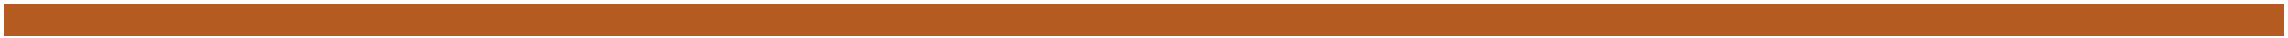

## Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfTips = pd.read_csv('/content/drive/MyDrive/yazokulu/football.csv')

#did not change the name of the file "dfTips", noticed this lately. - Onur

In [5]:
dfTips.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
dfTips.describe(include='all')

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


## Fit a Regression Model to Predict Tip

In [7]:
# Assign independent(Y) and dependent(X) variables
X = dfTips.loc[:,['height','age', 'appearance', 'goals', 'assists', 'clean sheets', 'days_injured', 'award']]
Y = dfTips.loc[:,['current_value']]

In [8]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [9]:
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-568835.5265041]
Coefficients: 
 [[ 4.68392007e+04 -4.21224768e+05  1.26462075e+05  1.05873841e+06
   3.04838120e+06  8.44277416e+04  2.94714137e+03  6.72460374e+05]]


In [10]:
# Generate new prediction - aka run scoring model
New_Height = 186.0
New_Age = 27
New_Appearance = 78
New_Goals = 14
New_Assists = 7
New_Clean_Sheets = 0
New_Days_Injured = 15
New_Award = 2
print ('Predicted current_value: \n', regr.predict([[New_Height ,New_Age ,New_Appearance,New_Goals,New_Assists,New_Clean_Sheets,New_Days_Injured,New_Award]]))

Predicted current_value: 
 [[44184362.91821593]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


utexas_ds_orie_divider_gray.png

## Explore Data

### Option 1: EDA in PowerBI

I did not do these because I dont think these are included in task? - Onur

#### Histogram of tip amounts where the bins cover $1.00 increments

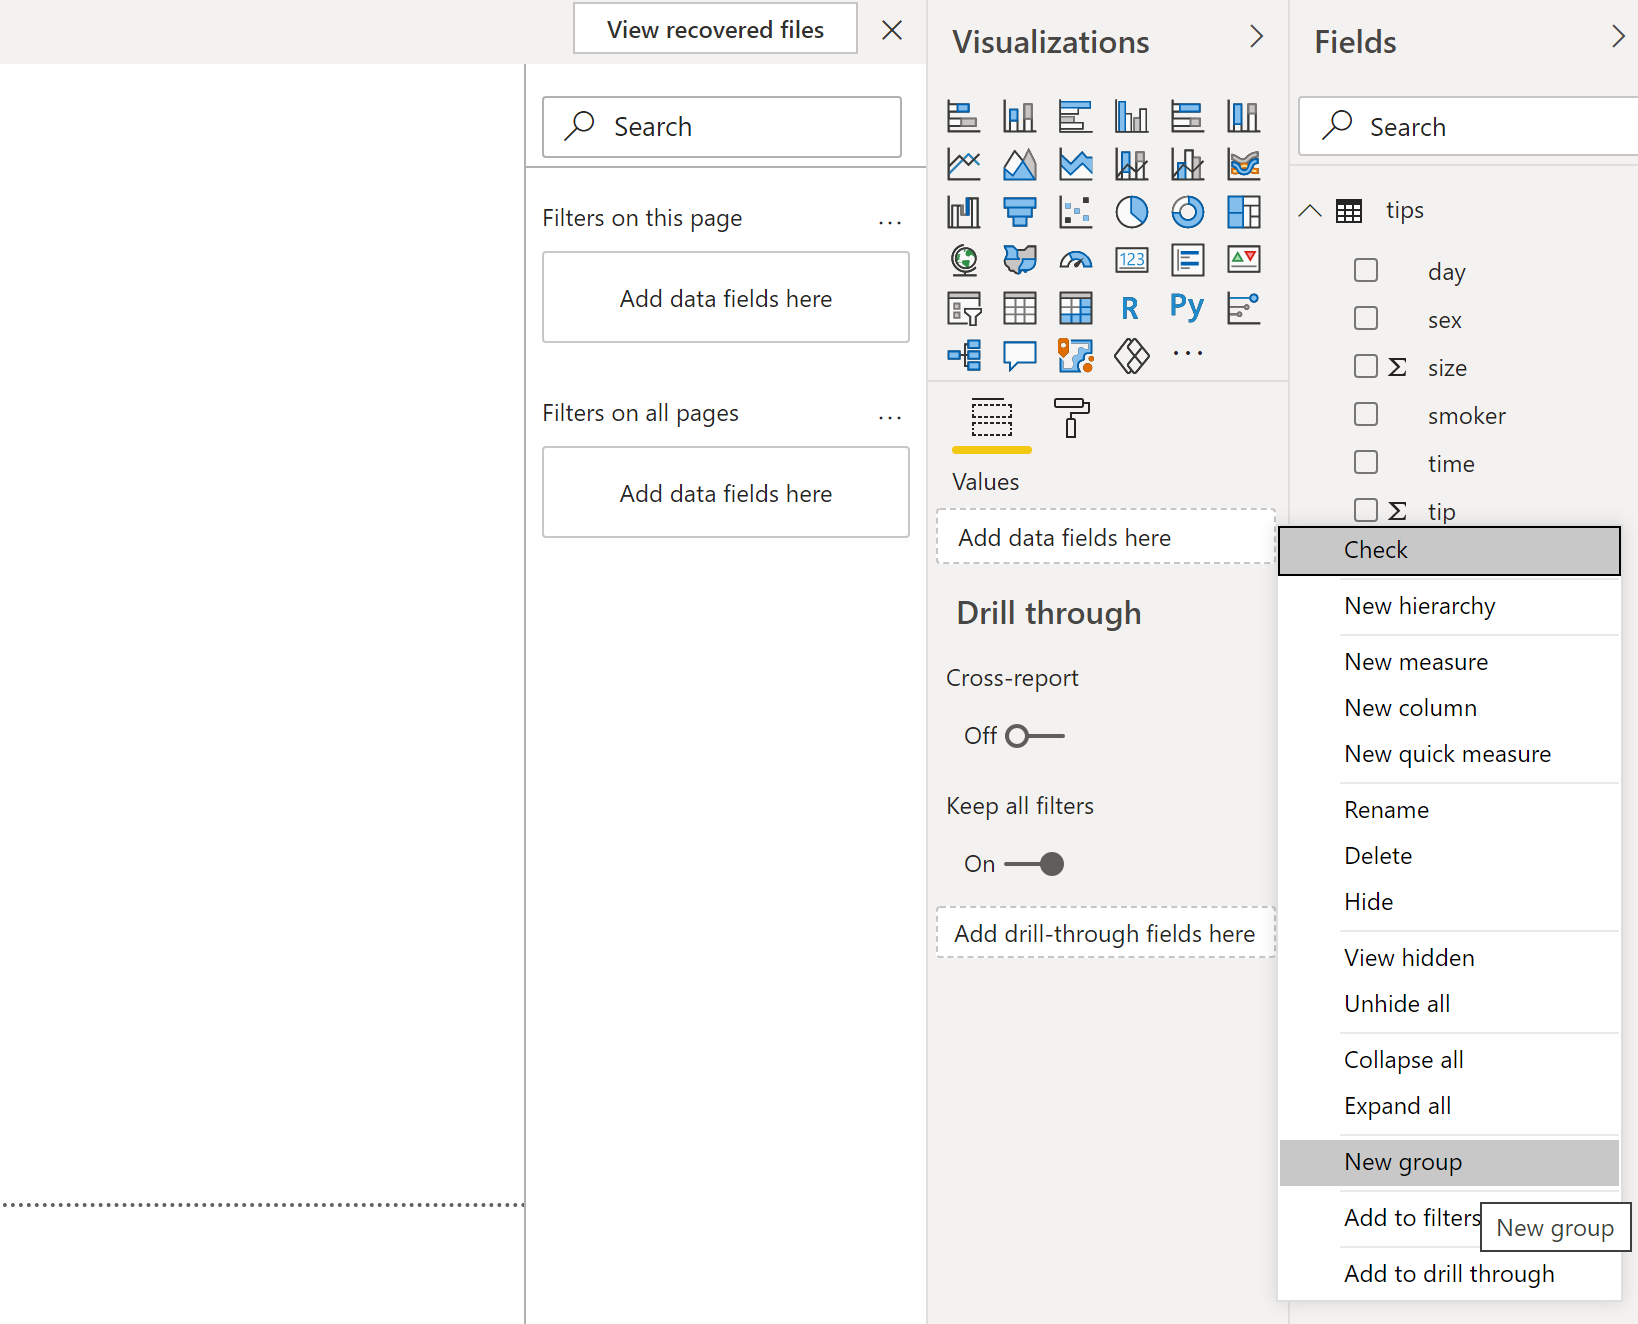

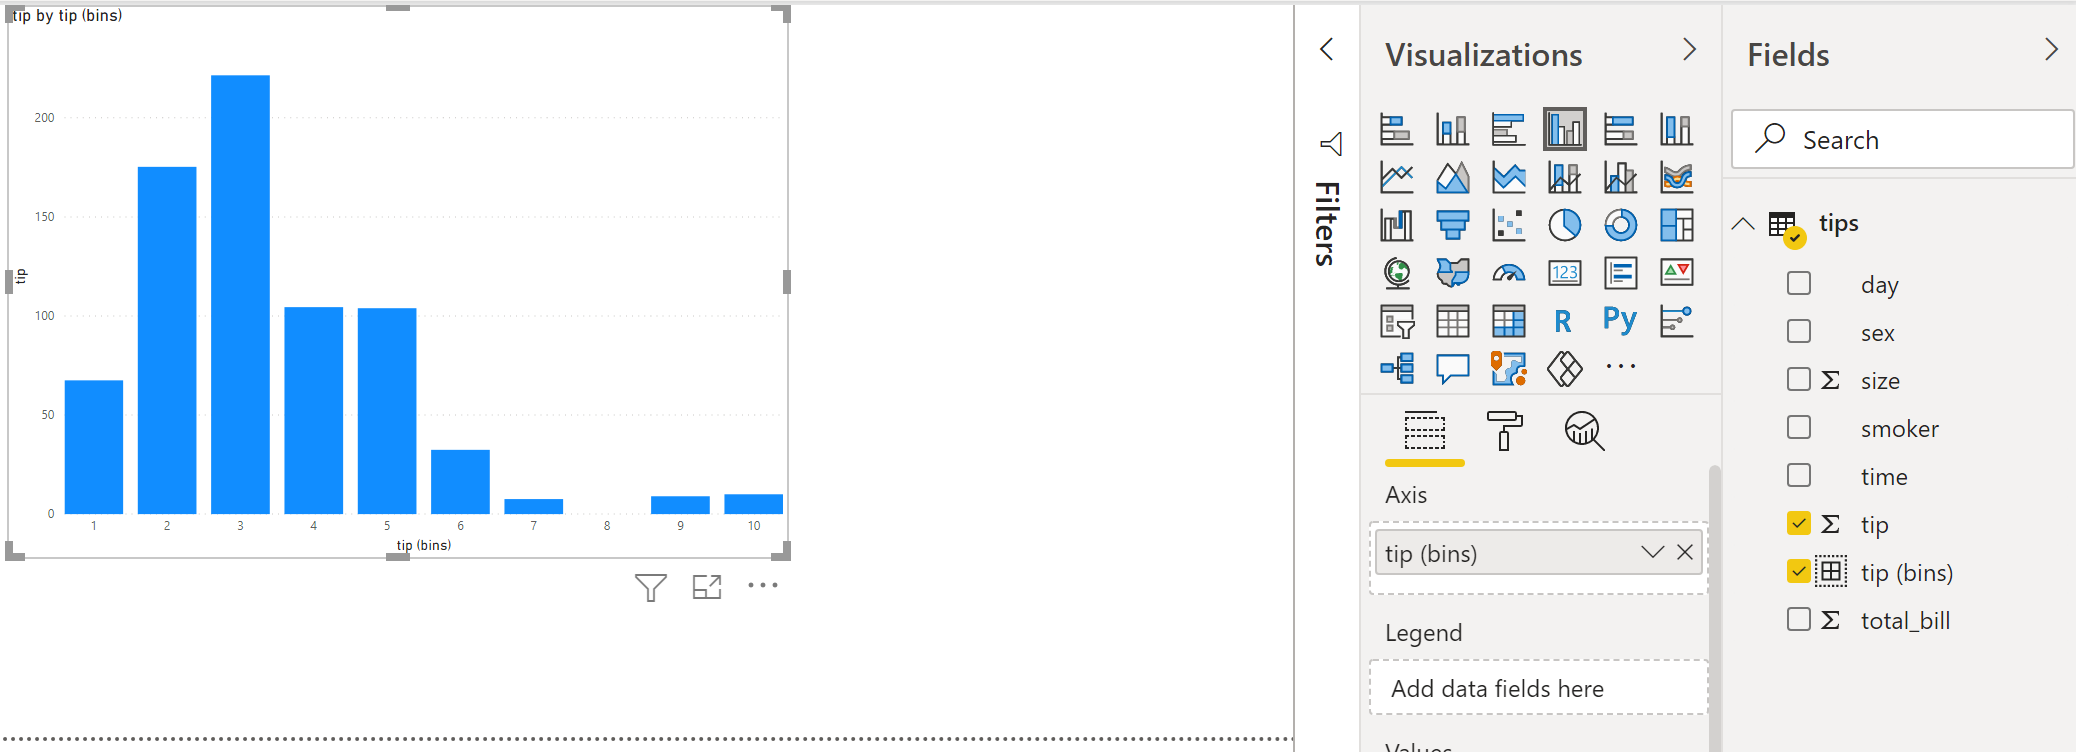

The distribution of values is skewed right and unimodal, as is common in distributions of small, non-negative quantities.

#### Histogram of tip amounts where the bins cover $0.10 increments

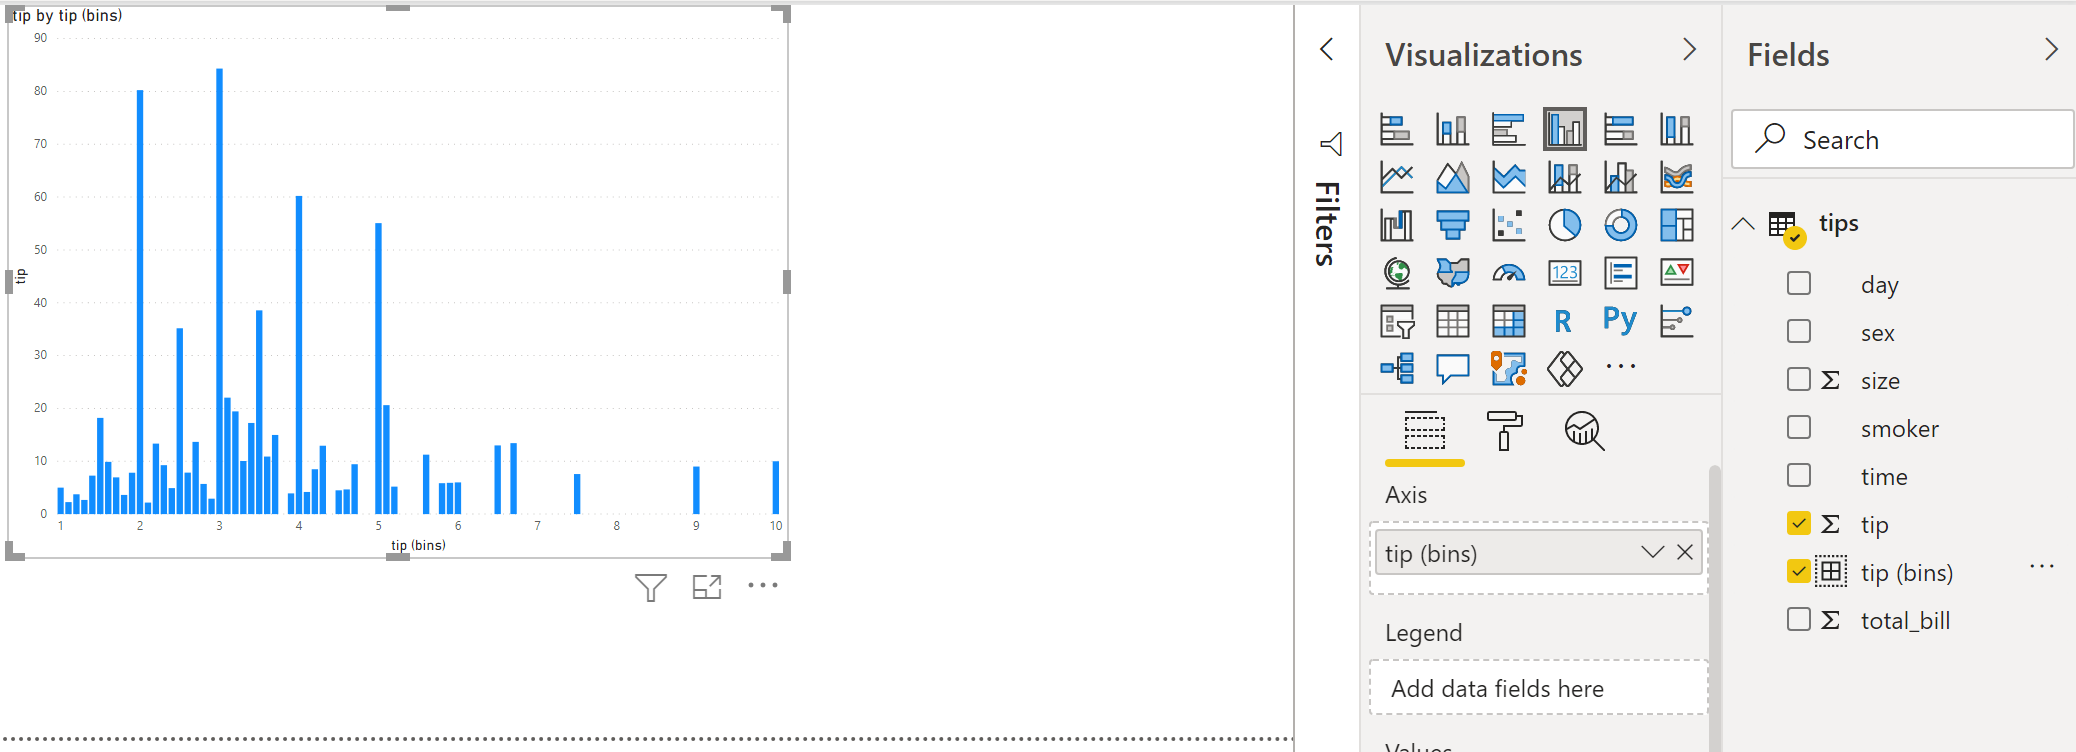

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of tips vs. bill

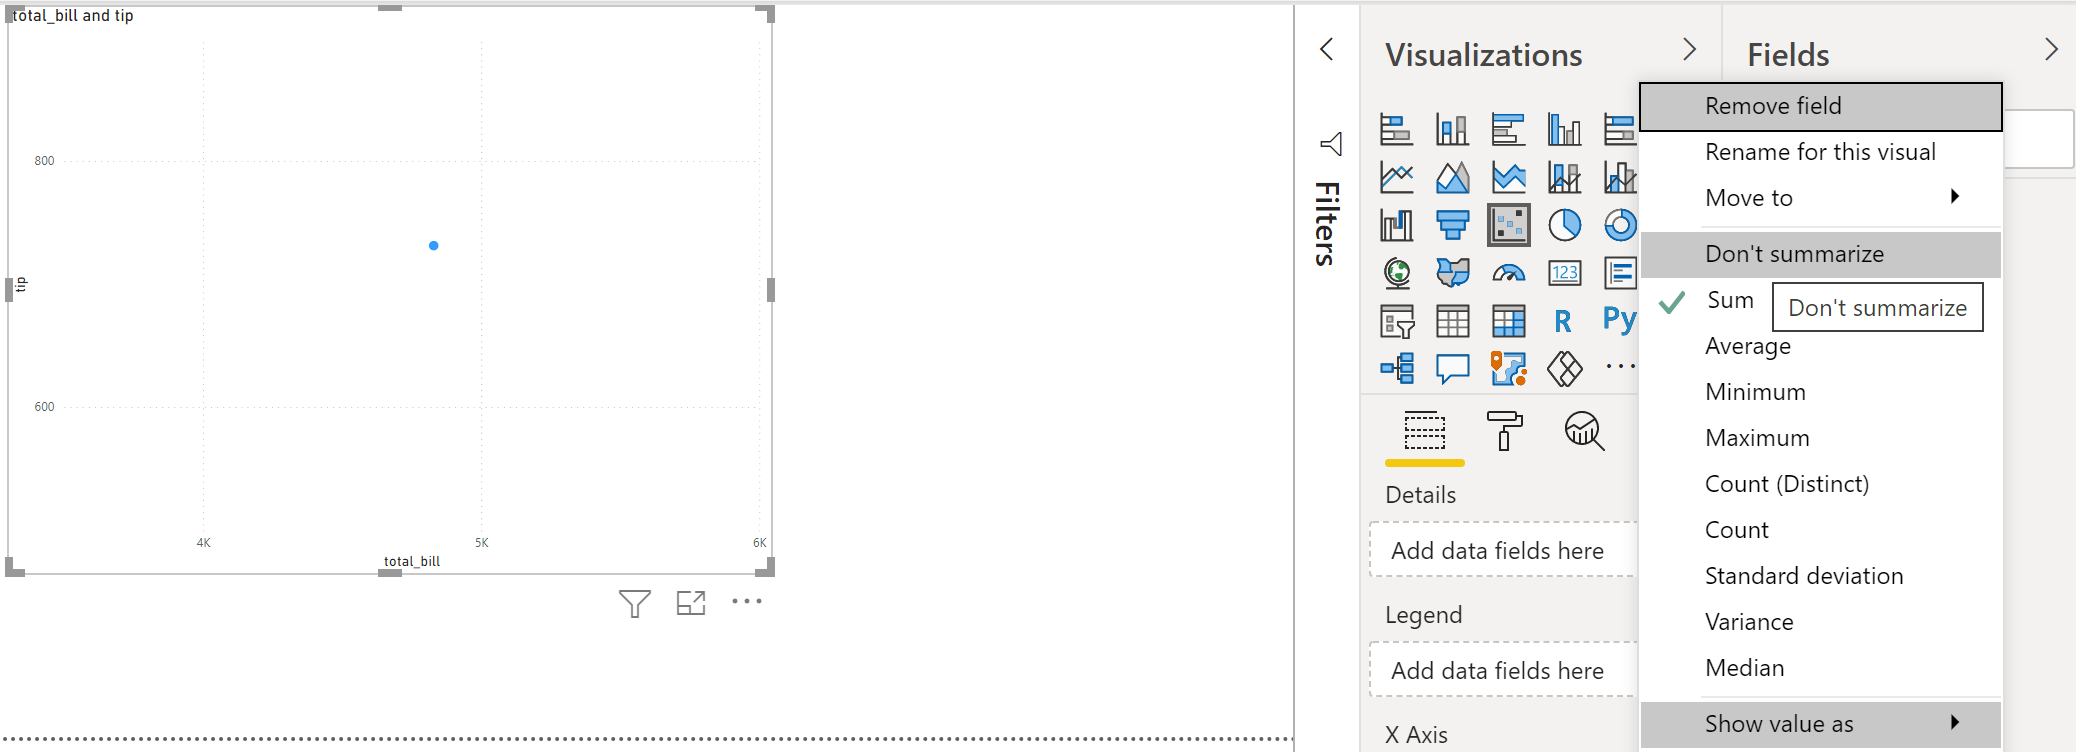

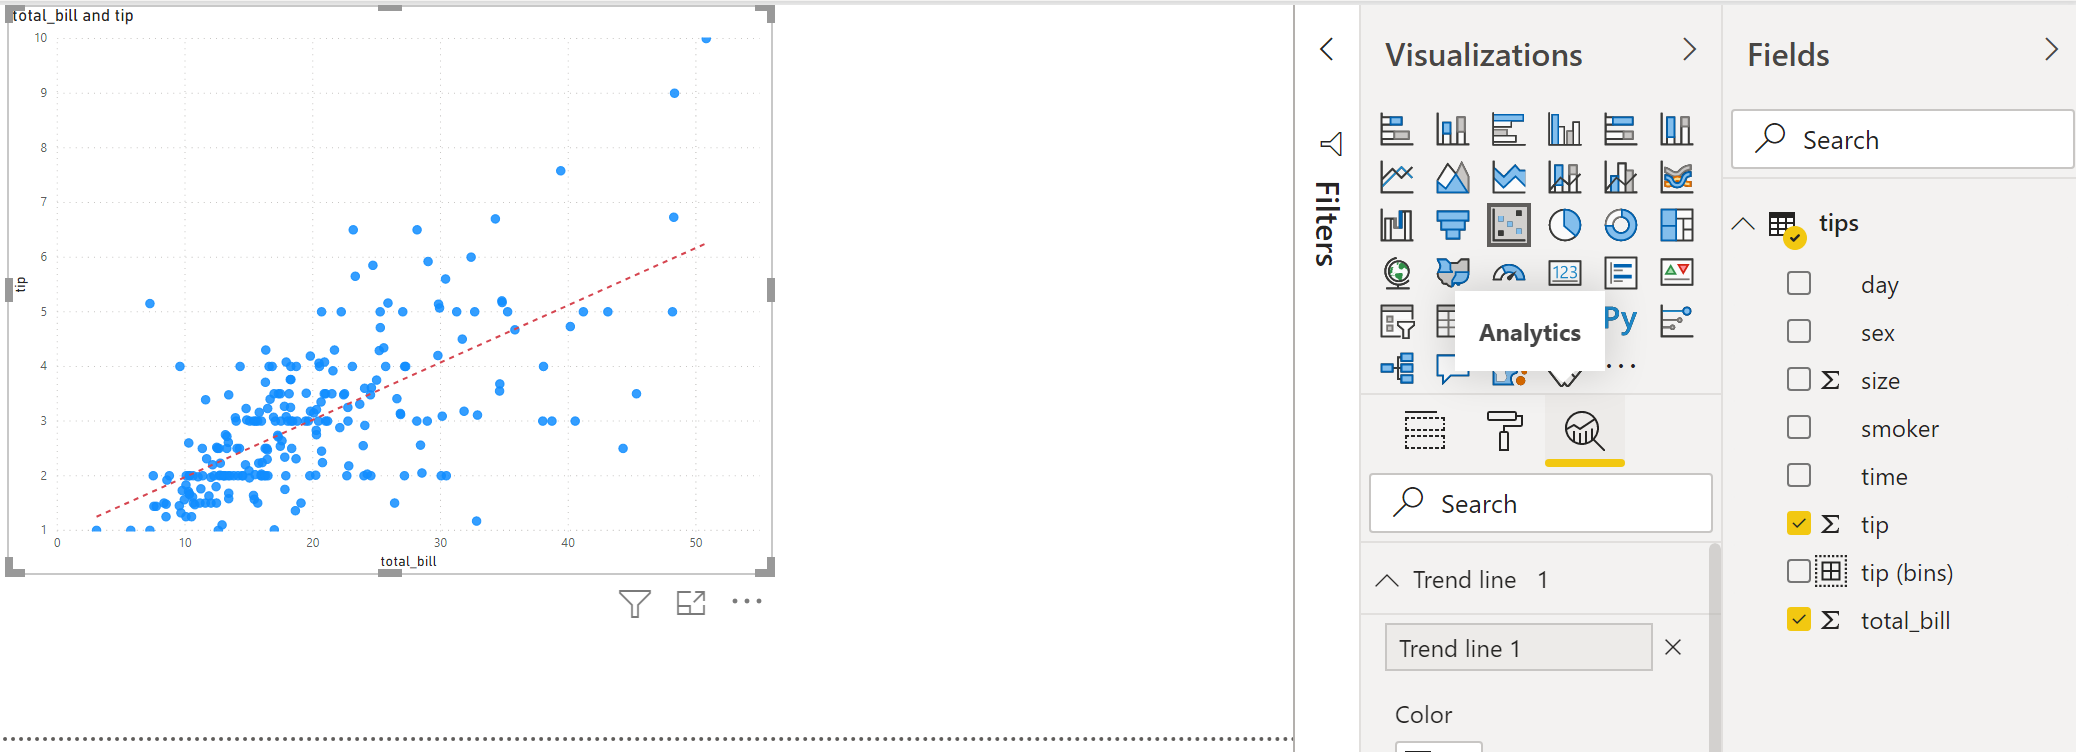

Points below the line correspond to tips that are lower than expected (for that bill amount), and points above the line are higher than expected. We might expect to see a tight, positive linear association, but instead see variation that increases with tip amount. In particular, there are more points far away from the line in the lower right than in the upper left, indicating that more customers are very cheap than very generous.

#### Scatterplot of tips vs. bill separated by payer gender and smoking section status

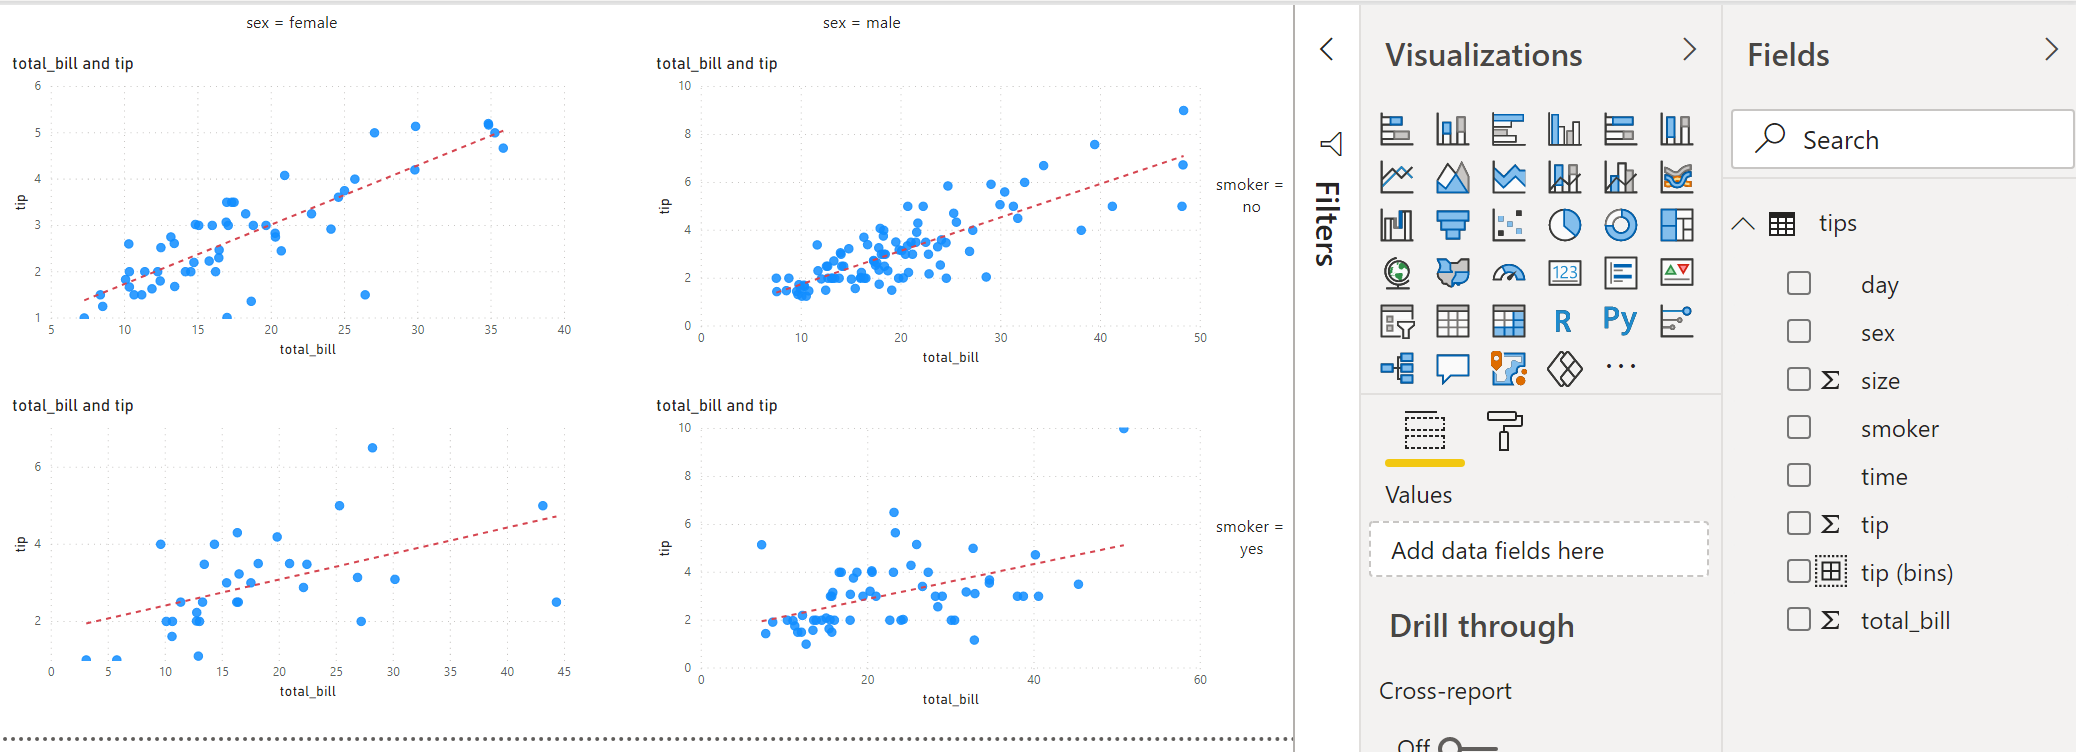

Scatterplot of tips vs. bill separated by payer gender and smoking section status. Smoking parties have a lot more variability in the tips that they give. Males tend to pay the (few) higher bills, and the female non-smokers tend to be very consistent tippers (with three conspicuous exceptions shown in the sample).

### Option 2: EDA in Python

#### Histogram of tip amounts where the bins cover $1.00 increments

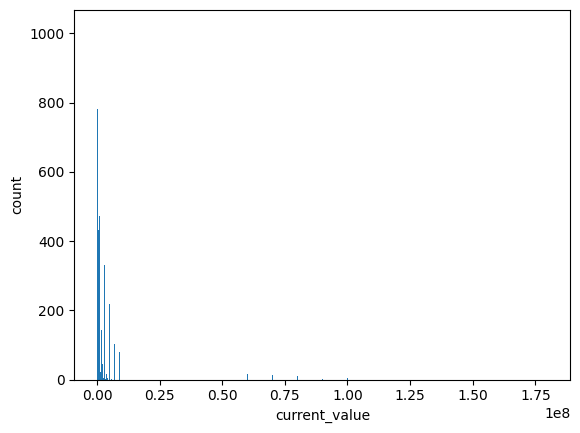

In [17]:
# Set data fields
y = dfTips.loc[:,'current_value']

# Set histogram parameters
binwidth = 100000.0
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('count')
plt.show()

The distribution of values is skewed right and unimodal, as is common in distributions of small, non-negative quantities.

#### Histogram of tip amounts where the bins cover $0.10 increments

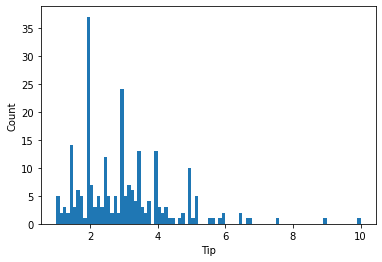

In [ ]:
# Set data fields
y = dfTips.loc[:,'tip']

# Set histogram parameters
binwidth = 0.1
binrange=np.arange(min(y), max(y) + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

An interesting phenomenon is visible: peaks occur at the whole-dollar and half-dollar amounts, which is caused by customers picking round numbers as tips. This behavior is common to other types of purchases too, like gasoline.

#### Scatterplot of tips vs. bill

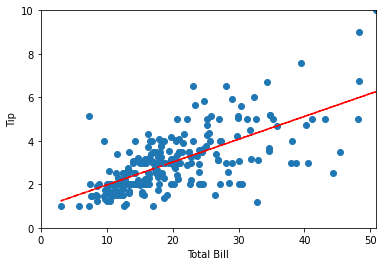

In [ ]:
# Set data fields
x = dfTips.loc[:,'total_bill']
y = dfTips.loc[:,'tip']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfTips.loc[:,'total_bill']))
plt.ylim(0,np.max(dfTips.loc[:,'tip']))
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Points below the line correspond to tips that are lower than expected (for that bill amount), and points above the line are higher than expected. We might expect to see a tight, positive linear association, but instead see variation that increases with tip amount. In particular, there are more points far away from the line in the lower right than in the upper left, indicating that more customers are very cheap than very generous.

#### Scatterplot of tips vs. bill separated by payer gender and smoking section status

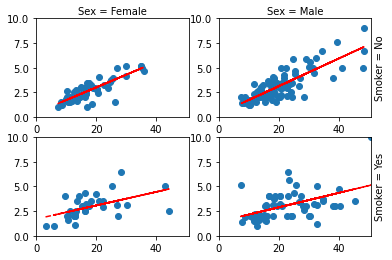

In [ ]:
### Matrix of plots
fig, axs = plt.subplots(2, 2)

## Top left plot
x = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='No'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='No'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 0].scatter(x,y)
axs[0, 0].plot(x,p(x),"r--")
axs[0, 0].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[0, 0].set_ylim(0,np.max(dfTips.loc[:,'tip']))
axs[0, 0].set_xlabel('Sex = Female')
axs[0, 0].xaxis.set_label_position("top")
#axs[0, 0].set_ylabel('Smoker = No')
#axs[0, 0].yaxis.set_label_position("right")

## Top right plot
x = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='No'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='No'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[0, 1].scatter(x,y)
axs[0, 1].plot(x,p(x),"r--")
axs[0, 1].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[0, 1].set_ylim(0,np.max(dfTips.loc[:,'tip']))
axs[0, 1].set_xlabel('Sex = Male')
axs[0, 1].xaxis.set_label_position("top")
axs[0, 1].set_ylabel('Smoker = No')
axs[0, 1].yaxis.set_label_position("right")

## Bottom left plot
x = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='Yes'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Female') & (dfTips['smoker']=='Yes'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 0].scatter(x,y)
axs[1, 0].plot(x,p(x),"r--")
axs[1, 0].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[1, 0].set_ylim(0,np.max(dfTips.loc[:,'tip']))
#axs[1, 0].set_xlabel('Sex = Female')
#axs[1, 0].xaxis.set_label_position("top")
#axs[1, 0].set_ylabel('Smoker = Yes')
#axs[1, 0].yaxis.set_label_position("right")

## Bottom right plot
x = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='Yes'),'total_bill']
y = dfTips.loc[(dfTips['sex']=='Male') & (dfTips['smoker']=='Yes'),'tip']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

axs[1, 1].scatter(x,y)
axs[1, 1].plot(x,p(x),"r--")
axs[1, 1].set_xlim(0,np.max(dfTips.loc[:,'total_bill']))
axs[1, 1].set_ylim(0,np.max(dfTips.loc[:,'tip']))
#axs[1, 1].set_xlabel('Sex = Male')
#axs[1, 1].xaxis.set_label_position("top")
axs[1, 1].set_ylabel('Smoker = Yes')
axs[1, 1].yaxis.set_label_position("right")


Scatterplot of tips vs. bill separated by payer gender and smoking section status. Smoking parties have a lot more variability in the tips that they give. Males tend to pay the (few) higher bills, and the female non-smokers tend to be very consistent tippers (with three conspicuous exceptions shown in the sample).

## Takeaways

What is learned from the plots is different from what is illustrated by the regression model, even though the experiment was not designed to investigate any of these other trends. The patterns found by exploring the data suggest hypotheses about tipping that may not have been anticipated in advance, and which could lead to interesting follow-up experiments where the hypotheses are formally stated and tested by collecting new data.

utexas_ds_orie_divider_gray.png